In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading and Cleaning Data
data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Filling missing values
data['LATEST_YEAR_ANNUAL_RETURN'].interpolate(method='linear', inplace=True)
data['LATEST_YEAR_FINANCIAL_STATEMENT'].interpolate(method='linear', inplace=True)

display(data.describe())

C:\Users\jasmi\AppData\Local\Temp\ipykernel_13056\1792948360.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')


Missing Values:
 CORPORATE_IDENTIFICATION_NUMBER               0
COMPANY_NAME                                  0
COMPANY_STATUS                                0
COMPANY_CLASS                               334
COMPANY_CATEGORY                            334
COMPANY_SUB_CATEGORY                        334
DATE_OF_REGISTRATION                         39
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
INDUSTRIAL_CLASS                            310
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
REGISTERED_OFFICE_ADDRESS                    90
REGISTRAR_OF_COMPANIES                      174
EMAIL_ADDR                                38129
LATEST_YEAR_ANNUAL_RETURN                 75889
LATEST_YEAR_FINANCIAL_STATEMENT           75782
dtype: int64


,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,1.508710e+05,1.508710e+05
mean,3.522781e+07,2.328824e+07
std,1.408554e+09,1.072458e+09
min,0.000000e+00,0.000000e+00
25%,1.000000e+05,1.000000e+05
50%,8.000000e+05,1.000000e+05
75%,2.000000e+06,6.857450e+05
max,3.000000e+11,2.461235e+11


In [2]:
#Converting Categorical Features to Numerical
label_encoder = LabelEncoder()
data['COMPANY_CLASS'] = label_encoder.fit_transform(data['COMPANY_CLASS'])
data['COMPANY_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_CATEGORY'])
data['COMPANY_SUB_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_SUB_CATEGORY'])
display(data.describe())

,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,150871.000000,150871.000000,150871.000000,1.508710e+05,1.508710e+05
mean,0.169701,1.000563,1.023484,3.522781e+07,2.328824e+07
std,0.550590,0.113658,0.258196,1.408554e+09,1.072458e+09
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,1.000000,1.000000e+05,1.000000e+05
50%,0.000000,1.000000,1.000000,8.000000e+05,1.000000e+05
75%,0.000000,1.000000,1.000000,2.000000e+06,6.857450e+05
max,3.000000,3.000000,5.000000,3.000000e+11,2.461235e+11


In [4]:
pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 919.0 kB/s eta 0:00:10
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.7 MB/s eta 0:00:03
     

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv("Data_Gov_Tamil_Nadu.csv")

# Data preprocessing for classification
# - Handle missing values
# - Encode categorical variables
# - Feature engineering for classification (if needed)

# Split the data into features (X) and the target (y)
X = data.drop(columns=["COMPANY_STATUS"])
y = data["COMPANY_STATUS"]

# Split the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier for classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions for classification
y_pred = rf_classifier.predict(X_test)

# Evaluate the classification model
classification_accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Data preprocessing for time series forecasting
# Assuming you have a date column (DATE_OF_REGISTRATION)
data["DATE_OF_REGISTRATION"] = pd.to_datetime(data["DATE_OF_REGISTRATION"])
time_series_data = data.groupby("DATE_OF_REGISTRATION").size().reset_index(name="count")
time_series_data.set_index("DATE_OF_REGISTRATION", inplace=True)

# Fit an ARIMA model for time series forecasting
arima_model = ARIMA(time_series_data, order=(5, 1, 0))  # You can adjust the order based on your data
arima_model_fit = arima_model.fit(disp=0)

# Forecast future registration trends
forecast_periods = 12  # Adjustment of the number of forecast periods
forecast, stderr, conf_int = arima_model_fit.forecast(steps=forecast_periods)

# Plot the time series and forecast for time series forecasting
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Actual")
plt.plot(
    pd.date_range(
        start=time_series_data.index[-1], periods=forecast_periods, closed="right"
    ),
    forecast,
    label="Forecast",
    color="red",
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Registration Count")
plt.title("Company Registration Trends")
plt.show()

# Print classification results and forecast for time series
print("Classification Results:")
print(f"Accuracy: {classification_accuracy}")
print(classification_report)

print("\nTime Series Forecast:")
print(f"Forecasted values: {forecast}")

,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,150871.000000,150871.000000,150871.000000,1.508710e+05,1.508710e+05
mean,0.169701,1.000563,1.023484,3.522781e+07,2.328824e+07
std,0.550590,0.113658,0.258196,1.408554e+09,1.072458e+09
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,1.000000,1.000000e+05,1.000000e+05
50%,0.000000,1.000000,1.000000,8.000000e+05,1.000000e+05
75%,0.000000,1.000000,1.000000,2.000000e+06,6.857450e+05
max,3.000000,3.000000,5.000000,3.000000e+11,2.461235e+11


C:\Users\jasmi\AppData\Local\Temp\ipykernel_13056\3217145314.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='COMPANY_CLASS', palette=palette)
C:\Users\jasmi\AppData\Local\Temp\ipykernel_13056\3217145314.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=data, x='COMPANY_CLASS', palette=palette)


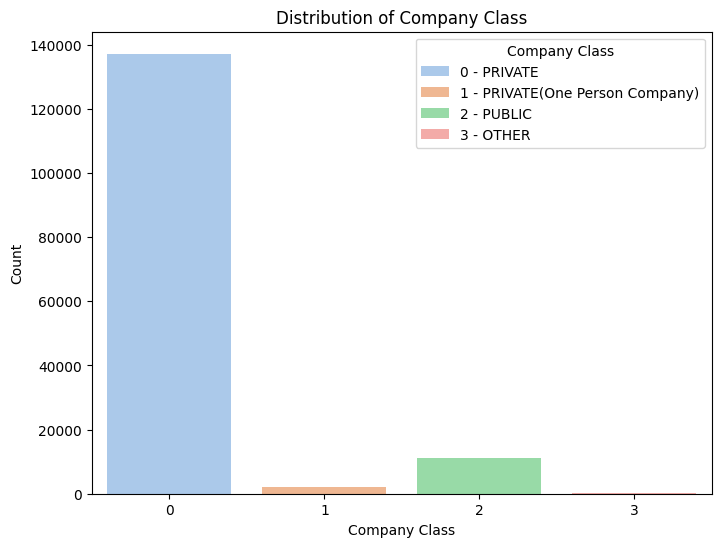

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 3: Exploratory Data Analysis (EDA)
# Basic statistics
summary_stats = data.describe()
display(summary_stats)

# Distribution of COMPANY_CLASS with legend
plt.figure(figsize=(8, 6))

palette = sns.color_palette("pastel")

sns.countplot(data=data, x='COMPANY_CLASS', palette=palette)

plt.title('Distribution of Company Class')
plt.xlabel('Company Class')
plt.ylabel('Count')

plt.legend(title='Company Class', labels=['0 - PRIVATE',
    '1 - PRIVATE(One Person Company)',
    '2 - PUBLIC',
    '3 - OTHER'], loc='upper right')

plt.show()


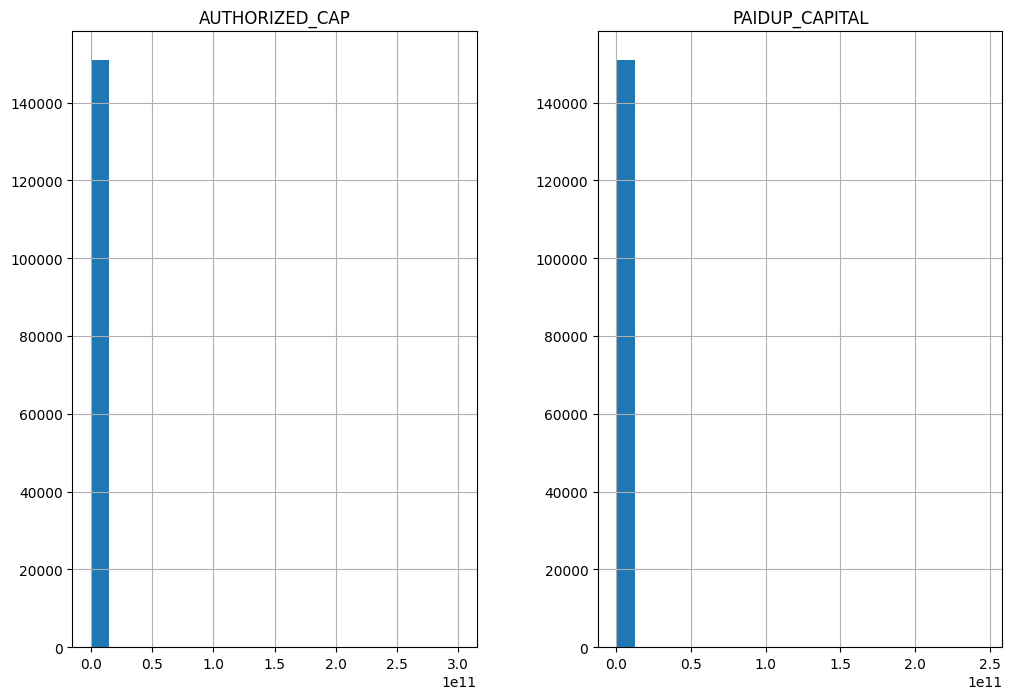

In [9]:
# Data distribution histograms for numerical attributes
numerical_attributes = data.select_dtypes(include=['int64', 'float64'])
numerical_attributes.hist(bins=20, figsize=(12, 8))
plt.show()

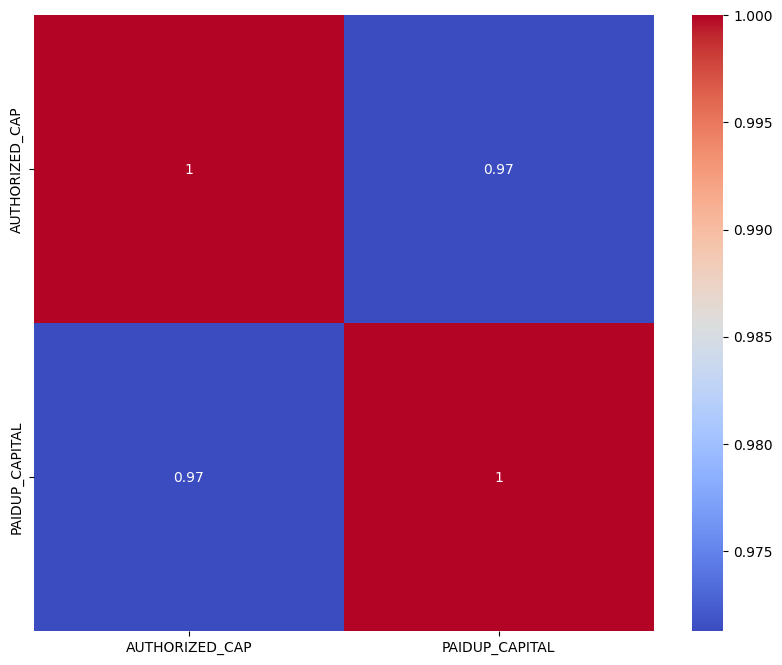

In [10]:
# Correlation matrix for numerical attributes
correlation_matrix = numerical_attributes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


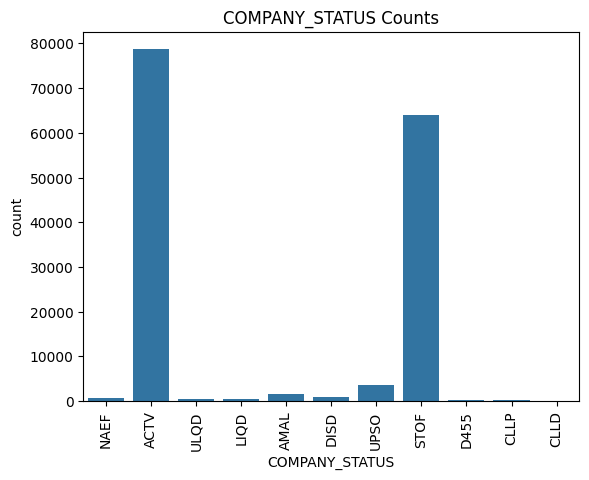

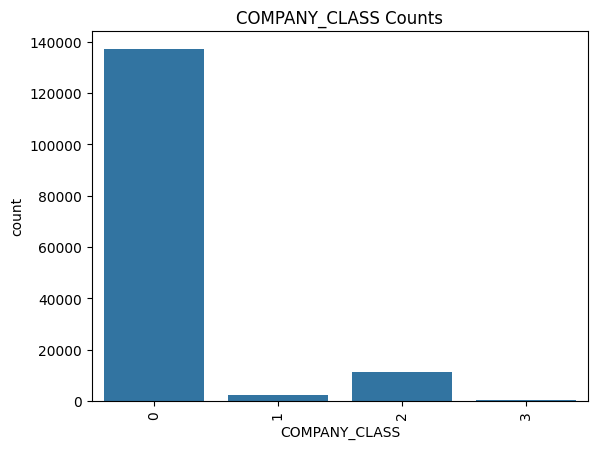

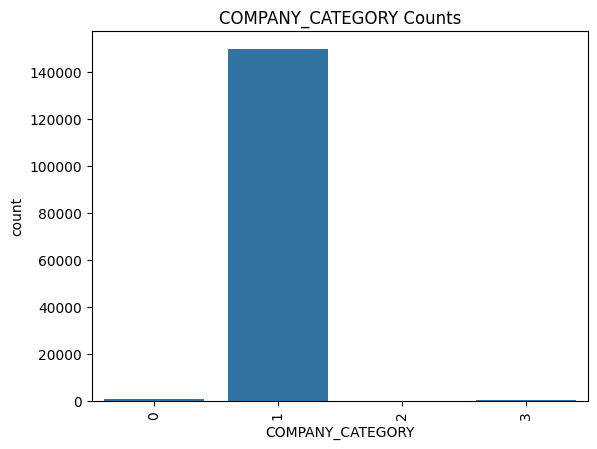

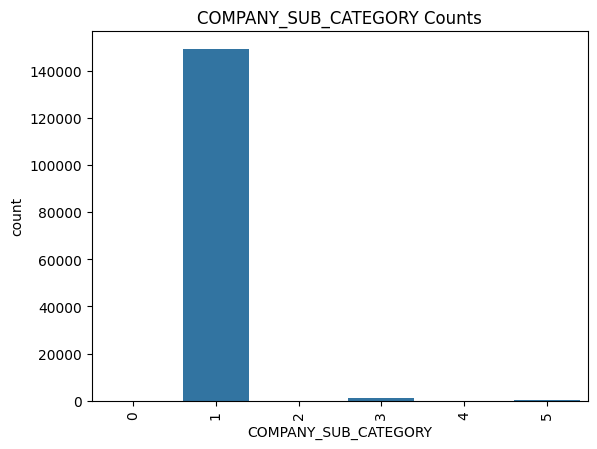

In [11]:

# Countplot for categorical variables
categorical_columns = ["COMPANY_STATUS", "COMPANY_CLASS", "COMPANY_CATEGORY", "COMPANY_SUB_CATEGORY"]
for column in categorical_columns:
    sns.countplot(x=column, data=data)
    plt.title(f"{column} Counts")
    plt.xticks(rotation=90)
    plt.show()

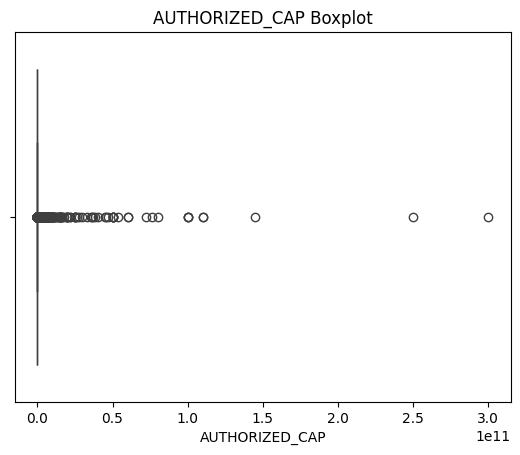

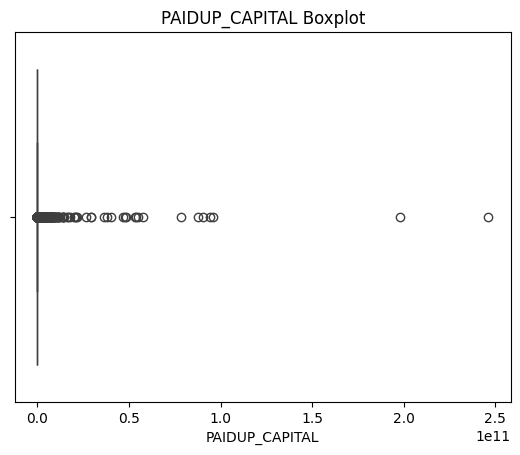

In [12]:
# Define numerical columns
numerical_columns = ["AUTHORIZED_CAP", "PAIDUP_CAPITAL"]

# Boxplot for numerical variables
for column in numerical_columns:
    sns.boxplot(x=column, data=data)
    plt.title(f"{column} Boxplot")
    plt.show()

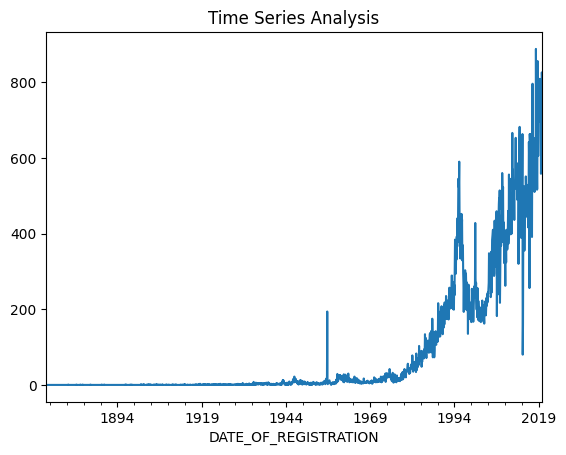

In [13]:
# Time series analysis (if DATE_OF_REGISTRATION is a time-based attribute)
if 'DATE_OF_REGISTRATION' in data:
    data['DATE_OF_REGISTRATION'] = pd.to_datetime(data['DATE_OF_REGISTRATION'], format='%d-%m-%Y')
    data.set_index('DATE_OF_REGISTRATION', inplace=True)
    time_series_plot = data.resample('M').size().plot()
    plt.title("Time Series Analysis")
    plt.show()

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)  # Display all columns

# Load the dataset
data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='latin1')

# Define numerical and categorical columns
numerical_columns = ["AUTHORIZED_CAP", "PAIDUP_CAPITAL"]
categorical_columns = ["COMPANY_STATUS", "COMPANY_CLASS", "COMPANY_CATEGORY", "COMPANY_SUB_CATEGORY"]

# Scaling of numerical columns using StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Label encoding of categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# One-Hot Encoding for Categorical Variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Date Feature Engineering
data['DATE_OF_REGISTRATION'] = pd.to_datetime(data['DATE_OF_REGISTRATION'], format='%d-%m-%Y')
data['Year'] = data['DATE_OF_REGISTRATION'].dt.year
data['Month'] = data['DATE_OF_REGISTRATION'].dt.month
data['Day'] = data['DATE_OF_REGISTRATION'].dt.day
data['DayOfWeek'] = data['DATE_OF_REGISTRATION'].dt.dayofweek

# Interaction Feature
data['Authorized_Paidup_Ratio'] = data['AUTHORIZED_CAP'] / data['PAIDUP_CAPITAL']

# Feature Scaling for Specific Columns
min_max_scaler = MinMaxScaler()
data['AUTHORIZED_CAP'] = min_max_scaler.fit_transform(data['AUTHORIZED_CAP'].values.reshape(-1, 1))

# Feature Imputation 
imputer = SimpleImputer(strategy='mean')
data['PAIDUP_CAPITAL'] = imputer.fit_transform(data['PAIDUP_CAPITAL'].values.reshape(-1, 1))

# Display the updated dataset
print(data.head())

C:\Users\jasmi\AppData\Local\Temp\ipykernel_13056\978602903.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='latin1')


  CORPORATE_IDENTIFICATION_NUMBER  \
0                          F00643   
1                          F00721   
2                          F00892   
3                          F01208   
4                          F01218   

                                        COMPANY_NAME DATE_OF_REGISTRATION  \
0                                   HOCHTIEFF AG,              1961-12-01   
1  SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...                  NaT   
2                      SRILANKAN AIRLINES LIMITED              1982-03-01   
3                            CALTEX INDIA LIMITED                     NaT   
4              GE HEALTHCARE BIO-SCIENCES LIMITED                     NaT   

  REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL INDUSTRIAL_CLASS  \
0       Tamil Nadu             0.0       -0.021715              NaN   
1       Tamil Nadu             0.0       -0.021715              NaN   
2       Tamil Nadu             0.0       -0.021715              NaN   
3       Tamil Nadu            

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
#  Loading and Cleaning Data
data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Filling missing values
data['LATEST_YEAR_ANNUAL_RETURN'].interpolate(method='linear', inplace=True)
data['LATEST_YEAR_FINANCIAL_STATEMENT'].interpolate(method='linear', inplace=True)

#Converting Categorical Features to Numerical
display(data.describe())
label_encoder = LabelEncoder()
data['COMPANY_CLASS'] = label_encoder.fit_transform(data['COMPANY_CLASS'])
data['COMPANY_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_CATEGORY'])
data['COMPANY_SUB_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_SUB_CATEGORY'])
display(data.describe())

# Split data into training and testing sets
features = ['COMPANY_CLASS', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'INDUSTRIAL_CLASS']
target = 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'

# Encode categorical features using Label Encoding
for feature in ['COMPANY_CLASS', 'INDUSTRIAL_CLASS']:
    data[feature] = data[feature].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Multi-Class Classification Model (Random Forest Classifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_13056\3776657429.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')


Missing Values:
 CORPORATE_IDENTIFICATION_NUMBER        0
COMPANY_NAME                           0
COMPANY_STATUS                         0
COMPANY_CLASS                        334
COMPANY_CATEGORY                     334
                                   ...  
REGISTERED_OFFICE_ADDRESS             90
REGISTRAR_OF_COMPANIES               174
EMAIL_ADDR                         38129
LATEST_YEAR_ANNUAL_RETURN          75889
LATEST_YEAR_FINANCIAL_STATEMENT    75782
Length: 17, dtype: int64


,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,1.508710e+05,1.508710e+05
mean,3.522781e+07,2.328824e+07
std,1.408554e+09,1.072458e+09
min,0.000000e+00,0.000000e+00
25%,1.000000e+05,1.000000e+05
50%,8.000000e+05,1.000000e+05
75%,2.000000e+06,6.857450e+05
max,3.000000e+11,2.461235e+11


,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,150871.000000,150871.000000,150871.000000,1.508710e+05,1.508710e+05
mean,0.169701,1.000563,1.023484,3.522781e+07,2.328824e+07
std,0.550590,0.113658,0.258196,1.408554e+09,1.072458e+09
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,1.000000,1.000000e+05,1.000000e+05
50%,0.000000,1.000000,1.000000,8.000000e+05,1.000000e+05
75%,0.000000,1.000000,1.000000,2.000000e+06,6.857450e+05
max,3.000000,3.000000,5.000000,3.000000e+11,2.461235e+11


RandomForestClassifier(random_state=42)

In [16]:
#  Model Evaluation
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted F1-score for multi-class
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Weighted F1-Score: {f1:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 1.00
Weighted F1-Score: 1.00
Classification Report:
                                                                                                                precision    recall  f1-score   support

Activities of private households as employers and undifferentiated production activities of private households       1.00      1.00      1.00         4
                                                                                          Agriculture & allied       1.00      1.00      1.00      1498
                                                                                                  Construction       1.00      1.00      1.00      1791
                                                                                                     Education       0.99      1.00      1.00       343
                                                                              Electricity gas and water supply       1.00      1.00      1.00       502
                         